# 1. Exploratory Data Analysis

# Table of Contents
1. [Import Libraries](#import_libraries)
2. [Read in Data](#read_in_data)
    1. [Combine Comments into comments_df](#combining_comments)
    2. [Exploring .json Files](#exploring_jsons)
    3. [Combine Videos into videos_df](#combining_videos)
3. [Analysing Data](#analysing_data)
    1. [Analysing view, like, dislike and comment counts](#analysing_view_like_dislike_comment_counts)
    2. [Inspect the quantiles for views, likes, dislikes, comments](#analysing_quantiles)
    3. [Create category_name Attribute for videos_df](#create_categoryname)
4. [Plot Video Distribution by Category in Percentage](#video_dist_by_category)
5. [Number of Videos in each Category](#num_videos_in_each_category)
6. [Category Level Distribution of views, likes, dislikes, comments](#cld)
    1. [Category Level Distribution of views](#cld_views)
    2. [Category Level Distribution of likes](#cld_likes)
    3. [Category Level Distribution of dislikes](#cld_dislikes)
    4. [Category Level Distribution of comments](#cld_comments)
7. [Percentage of viewers that left a like/dislike/comment](#percentage_viewers)
    1. [Create Attributes: like_rate, dislike_rate, comment_rate](#create_rate_attrs)
8. [Analysing Correlation Matrix of Numerical Variables](#analysing_correlation)
9. [Save Comments and Videos Files after Pre-processed](#save_comments_videos)

### Import Libraries <a name="import_libraries"></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import json
from subprocess import check_output
from pathlib import Path
cwd = Path('.')

### Read in Data <a name="read_in_data"></a>

In [2]:
us_comments_df = pd.read_csv(cwd/'data_scraper'/'kaggle'/"UScomments.csv", error_bad_lines=False)
gb_comments_df = pd.read_csv(cwd/'data_scraper'/'kaggle'/"GBcomments.csv", error_bad_lines=False)
us_videos_df = pd.read_csv(cwd/'data_scraper'/'kaggle'/"USvideos.csv", error_bad_lines=False)
gb_videos_df = pd.read_csv(cwd/'data_scraper'/'kaggle'/"GBvideos.csv", error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'
b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkippin

In [3]:
with open(cwd/'data_scraper'/'kaggle'/'US_category_id.json') as json_file:
    us_json = json.load(json_file)
with open(cwd/'data_scraper'/'kaggle'/'GB_category_id.json') as json_file:
    gb_json = json.load(json_file)

#### Combine Comments into comments_df <a name="combining_comments"></a>

In [4]:
comments_df = pd.concat([us_comments_df, gb_comments_df]).reset_index(drop=True)

In [5]:
comments_df.describe()

,video_id,comment_text,likes,replies
count,1409852,1409801,1409852,1409852
unique,3150,622630,1814,548
top,LunHybOKIjU,Hi,0,0
freq,2000,651,1033334,1199068


In [6]:
comments_df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


#### Exploring .json Files <a name="exploring_jsons"></a>

First, lets create a mapping from category id to category string for both US and GB to see if there is any discrepancy (i.e. same category id but different category name)

In [7]:
# Getting the id -> name mappings for us and gb
us_id_to_category = {}
for i in us_json['items']:
    category = i['snippet']['title']
    id = int(i['id'])
    us_id_to_category[id] = category
gb_id_to_category = {}
for i in gb_json['items']:
    category = i['snippet']['title']
    id = int(i['id'])
    gb_id_to_category[id] = category

In [8]:
from tabulate import tabulate
emptylist=[]
for k, v in us_id_to_category.items():
    emptylist.append([k,v])
print(tabulate(emptylist, headers=['category_id', 'category_name'],tablefmt="psql"))

+---------------+-----------------------+
|   category_id | category_name         |
|---------------+-----------------------|
|             1 | Film & Animation      |
|             2 | Autos & Vehicles      |
|            10 | Music                 |
|            15 | Pets & Animals        |
|            17 | Sports                |
|            18 | Short Movies          |
|            19 | Travel & Events       |
|            20 | Gaming                |
|            21 | Videoblogging         |
|            22 | People & Blogs        |
|            23 | Comedy                |
|            24 | Entertainment         |
|            25 | News & Politics       |
|            26 | Howto & Style         |
|            27 | Education             |
|            28 | Science & Technology  |
|            29 | Nonprofits & Activism |
|            30 | Movies                |
|            31 | Anime/Animation       |
|            32 | Action/Adventure      |
|            33 | Classics        

In [9]:
from tabulate import tabulate
emptylist=[]
for k, v in gb_id_to_category.items():
    emptylist.append([k,v])
print(tabulate(emptylist, headers=['category_id', 'category_name'],tablefmt="psql"))

+---------------+----------------------+
|   category_id | category_name        |
|---------------+----------------------|
|             1 | Film & Animation     |
|             2 | Autos & Vehicles     |
|            10 | Music                |
|            15 | Pets & Animals       |
|            17 | Sports               |
|            18 | Short Movies         |
|            19 | Travel & Events      |
|            20 | Gaming               |
|            21 | Videoblogging        |
|            22 | People & Blogs       |
|            23 | Comedy               |
|            24 | Entertainment        |
|            25 | News & Politics      |
|            26 | Howto & Style        |
|            27 | Education            |
|            28 | Science & Technology |
|            30 | Movies               |
|            31 | Anime/Animation      |
|            32 | Action/Adventure     |
|            33 | Classics             |
|            34 | Comedy               |
|            35 

In [10]:
# Check for discrepancies (i.e. same category id but different category name)
flag = True
for k, v in us_id_to_category.items():
    if k in gb_id_to_category:
        if us_id_to_category[k] != gb_id_to_category[k]:
            flag = False
            print(f"category id {k} is different for us and gb: us - {us_id_to_category[k]}, gb - {gb_id_to_category[k]}")
if flag: print("No discrepancies")

No discrepancies


In [11]:
# Check for extra categories (i.e. does us or gb have category that the other does not?)
us_id_set = set(us_id_to_category.keys())
gb_id_set = set(gb_id_to_category.keys())

if len(us_id_set.difference(gb_id_set)):
    for i in us_id_set.difference(gb_id_set):
        print(f"us had category id {i} but gb does not")
if len(gb_id_set.difference(us_id_set)):
    for i in gb_id_set.difference(us_id_set):
        print(f"gb had category id {i} but us does not")

us had category id 29 but gb does not


Seems like there are no discrepancies, but there is no category id 29 for gb

In [12]:
us_id_to_category[29]

'Nonprofits & Activism'

### Combine Videos into videos_df <a name="combining_videos"></a>

In [13]:
videos_df = pd.concat([us_videos_df, gb_videos_df]).reset_index(drop=True)

In [14]:
videos_df.describe()

,category_id,views,likes,dislikes,comment_total,date
count,15985.000000,1.598500e+04,1.598500e+04,15985.000000,15985.000000,15985.000000
mean,19.977979,1.024885e+06,3.667593e+04,1655.234032,4800.072443,16.091561
std,7.301495,2.638562e+06,1.007493e+05,9591.500385,23774.231115,7.677685
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.100000
25%,17.000000,1.034140e+05,2.268000e+03,69.000000,298.000000,11.100000
50%,23.000000,3.120620e+05,9.168000e+03,259.000000,1059.000000,16.100000
75%,25.000000,9.660010e+05,3.085400e+04,934.000000,3393.000000,21.100000
max,43.000000,5.896141e+07,2.289911e+06,318404.000000,813322.000000,30.090000


In [15]:
videos_df.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


### Analysing Data <a name="analysing_data"></a>

In [16]:
# Looking at some information of video data
print(videos_df.shape)
print(videos_df.nunique())

(15985, 11)
video_id           3280
title              3341
channel_title      1704
category_id          16
tags               3046
views             15268
likes             11664
dislikes           3306
comment_total      5506
thumbnail_link     3280
date                 40
dtype: int64


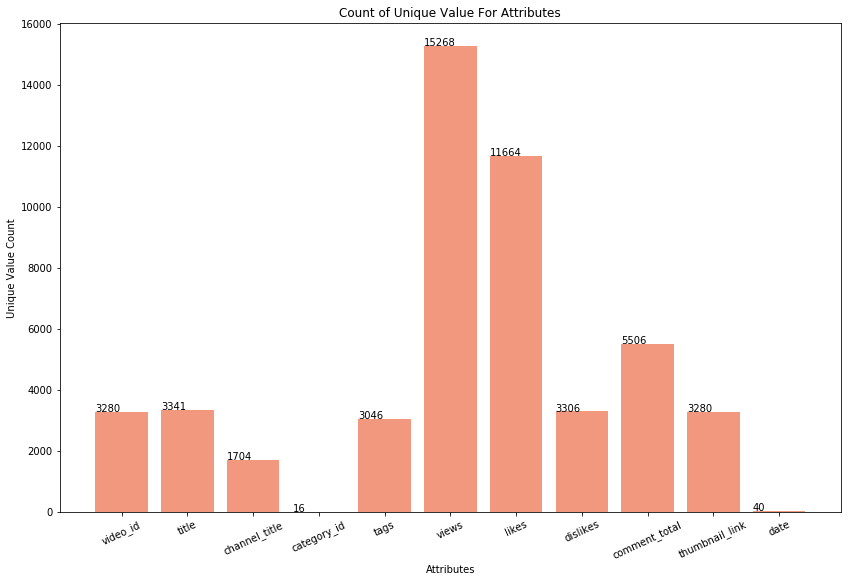

In [18]:
objects = ('video_id','title','channel_title','category_id','tags', 'views','likes', 'dislikes', 'comment_total','thumbnail_link','date')
y_pos = np.arange(len(objects))
uniqueValueCount = [3280, 3341, 1704, 16, 3046, 15268, 11664, 3306, 5506,3280,40]

plt.figure(figsize = (14,9))

bars =plt.bar(y_pos, uniqueValueCount, align='center', alpha=0.5,color=(0.9, 0.2, 0, 1))
plt.xticks(y_pos, objects, rotation=25)
plt.ylabel('Unique Value Count')
plt.xlabel('Attributes')
plt.title('Count of Unique Value For Attributes')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.show()

Although there are 15985 rows of data but there are only 3280 unique video_id. This means that there are videos that trend more than one day in the 40 days period. 

Next, we also noticed that the number of unique titles and number of unique tags  are slightly more than the number of unique video_id. This means that some of the video titles and tags are changed when the video is on trending. 


Besides, there are only 16 unique categories in the video statistic files but there are 32 categories in GB_category_id.json file and 31 categories in US_category_id.json file. To confirm that our dataset consists of the correct information, we went to youtube upload page and realised there are only 15 categories available for the user to choose from. Hence, we assume that Youtube changes the number of categories overtime to group the subset of categories together into bigger category and our dataset that contains only 16 unique categories is correct.


In [17]:
# Check the dtypes, check for nulls
videos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15985 entries, 0 to 15984
Data columns (total 11 columns):
video_id          15985 non-null object
title             15985 non-null object
channel_title     15985 non-null object
category_id       15985 non-null int64
tags              15985 non-null object
views             15985 non-null int64
likes             15985 non-null int64
dislikes          15985 non-null int64
comment_total     15985 non-null int64
thumbnail_link    15985 non-null object
date              15985 non-null float64
dtypes: float64(1), int64(5), object(5)
memory usage: 1.3+ MB


#### Analysing view, like, dislike and comment counts <a name="analysing_view_like_dislike_comment_counts"></a>

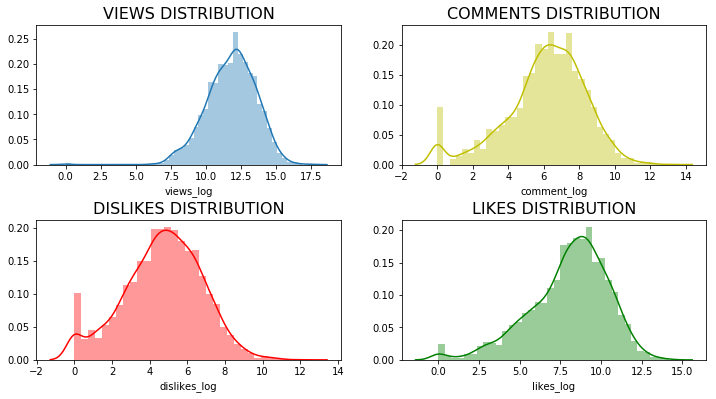

In [18]:
# Create log attributes
videos_df['likes_log'] = np.log(videos_df['likes'] + 1) # +1 for smoothing since log(0) is undefined
videos_df['views_log'] = np.log(videos_df['views'] + 1)
videos_df['dislikes_log'] = np.log(videos_df['dislikes'] + 1)
videos_df['comment_log'] = np.log(videos_df['comment_total'] + 1)
videos_Last = videos_df.drop_duplicates('video_id') 
# drop duplicate so that the distribution wont be affected by same video twice.

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(videos_Last['views_log'])
g1.set_title("VIEWS DISTRIBUTION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(videos_Last['likes_log'],color='green')
g2.set_title('LIKES DISTRIBUTION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(videos_Last['dislikes_log'], color='r')
g3.set_title("DISLIKES DISTRIBUTION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(videos_Last['comment_log'],color='y')
g4.set_title("COMMENTS DISTRIBUTION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [19]:
from tabulate import tabulate
emptylist=[['views_log',videos_Last.views_log.mean()],['comment_log',videos_Last.comment_log.mean()],
           ['dislikes_log',videos_Last.dislikes_log.mean()],['likes_log',videos_Last.likes_log.mean()]]
print(tabulate(emptylist, headers=['Description', 'Mean'],tablefmt="psql"))

+---------------+----------+
| Description   |     Mean |
|---------------+----------|
| views_log     | 11.8352  |
| comment_log   |  6.11126 |
| dislikes_log  |  4.71153 |
| likes_log     |  8.04009 |
+---------------+----------+


All the distributions show that the data near the mean are more frequent in occurrence than data far from the mean, which is one of the properties of the normal distribution. However, all the distributions are not fully symmetric about the mean.

Views distribution and likes distribution are negatively skewed as the left tail is longer than the right tail. This is because there are comparatively more videos with less number of views and likes than video with large number of views and likes.

Comments distribution, dislike distribution and likes distribution has thicker left tail and a significance number of zeros. This situation is reasonable because  a lot of people only view the video but do not dislike, like or comment. 

#### Inspect the quantiles for views, likes, dislikes, comments <a name="analysing_quantiles"></a>

In [20]:
print("Views quantiles")
print(videos_Last['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(videos_Last['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(videos_Last['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(videos_Last['comment_total'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01       2058.16
0.25      44807.50
0.50     159254.00
0.75     478777.25
0.99    4831565.14
Name: views, dtype: float64

Likes quantiles
0.01         1.00
0.25       817.00
0.50      4318.50
0.75     16287.75
0.99    263824.58
Name: likes, dtype: float64

Dislikes quantiles
0.01       0.00
0.25      29.75
0.50     122.50
0.75     473.50
0.99    9018.21
Name: dislikes, dtype: float64

Comment quantiles
0.01        0.00
0.25      145.75
0.50      572.50
0.75     2014.75
0.99    35372.02
Name: comment_total, dtype: float64


#### Create category_name Attribute <a name="create_categoryname"></a>

In [21]:
videos_df['category_name'] = videos_df.apply(lambda row: us_id_to_category[row['category_id']], axis=1)

In [22]:
videos_df.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,likes_log,views_log,dislikes_log,comment_log,category_name
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,12.676245,15.295757,8.688117,10.741730,Entertainment
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09,12.132717,15.877312,10.191670,0.000000,Science & Technology
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09,13.264901,15.581253,10.590994,12.047716,People & Blogs
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09,10.125671,14.787086,8.421343,9.459541,Science & Technology
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09,11.479027,13.970916,6.343880,8.804925,Comedy


### Plot Video Distribution by Category in Percentage <a name="video_dist_by_category"></a>

['Nonprofits & Activism', 'Travel & Events', 'Film & Animation', 'People & Blogs', 'Music', 'Education', 'Entertainment', 'News & Politics', 'Autos & Vehicles', 'Pets & Animals', 'Sports', 'Howto & Style', 'Science & Technology', 'Shows', 'Gaming', 'Comedy']
[0.27439024390243905, 0.7012195121951219, 4.115853658536586, 12.560975609756097, 14.725609756097562, 3.018292682926829, 19.817073170731707, 7.0426829268292686, 1.25, 1.1585365853658536, 8.963414634146341, 11.28048780487805, 4.847560975609756, 0.03048780487804878, 2.5609756097560976, 7.652439024390244]


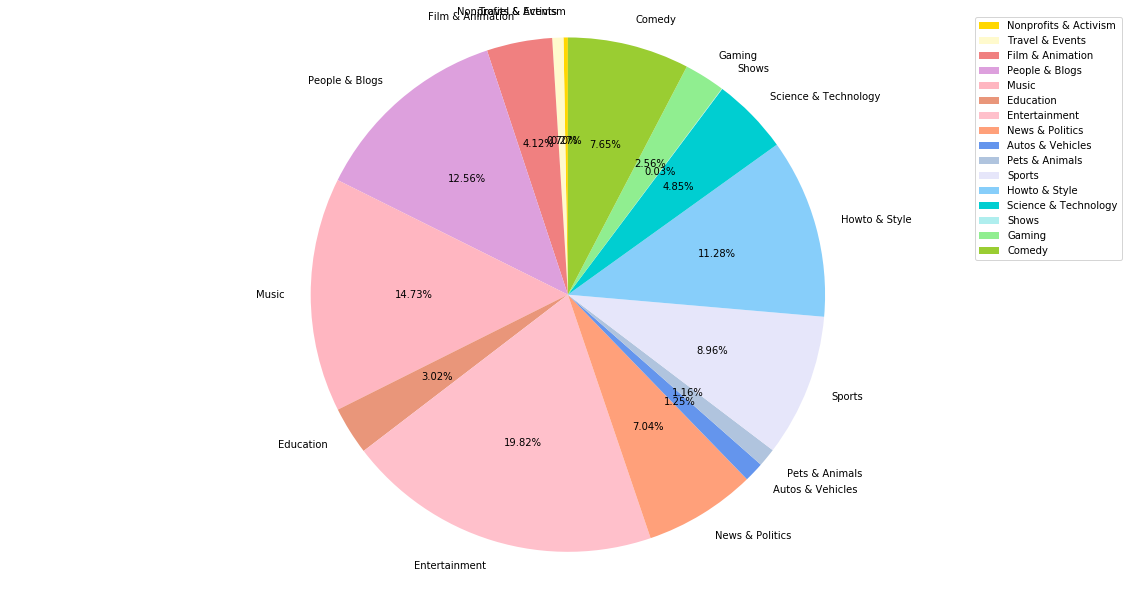

In [23]:
videos_Last = videos_df.drop_duplicates('video_id')# drop duplicates
category_list = videos_Last['category_name'].tolist()
category_list = list(set(category_list))
for i in category_list:
    if str(i) == 'nan':
        category_list.remove(i)
print (category_list)

totalnum = videos_Last.shape[0]

number_of_videos=[]
for cat in category_list:
    tmp_df=videos_Last.loc[videos_Last['category_name']==cat]
    tmp_count=tmp_df.shape[0]
    number_of_videos.append(tmp_count*100/totalnum)

print (number_of_videos)

d={'category':category_list,'video percentage':number_of_videos}
tmp_df=pd.DataFrame(data=d)

fig1, ax1 = plt.subplots()
colors = ['gold', 'lemonchiffon','lightcoral','plum','lightpink','darksalmon','pink','lightsalmon',
          'cornflowerblue','lightsteelblue','lavender','lightskyblue','darkturquoise','paleturquoise',
          'lightgreen','yellowgreen']
patches,text,z=ax1.pie(number_of_videos,colors=colors,labels=category_list,autopct='%1.2f%%',startangle=90,radius=3)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(patches, category_list, loc="best")
fig =plt.gcf()
fig.set_size_inches(20, 10.5)
fig.savefig('video_percentage.png', dpi=200)
plt.show()

### Number of Videos in each Category <a name="num_videos_in_each_category"></a>

Category Name count
Entertainment     650
Music             483
People & Blogs    412
Howto & Style     370
Sports            294
Name: category_name, dtype: int64


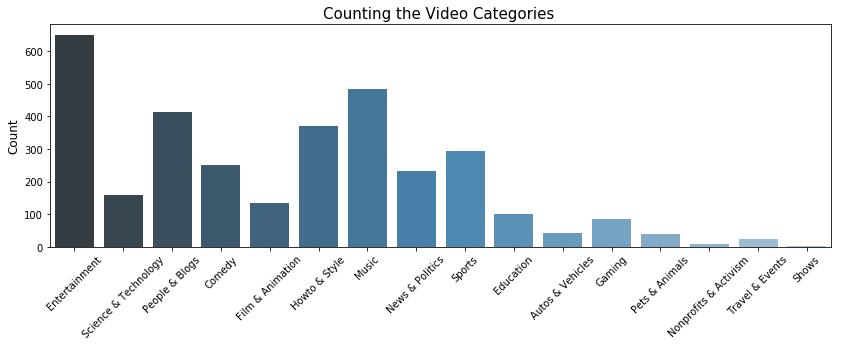

In [24]:
print("Category Name count")
print(videos_Last.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=videos_Last, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Categories ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.show()

Entertainment is the most popular category in Youtube trending videos followed by Music, People & Blogs and Howto & Style.

### Category Level Distribution of views, likes, dislikes, comments <a name="cld"></a>

#### Category Level Distribution of views <a name="cld_views"></a>

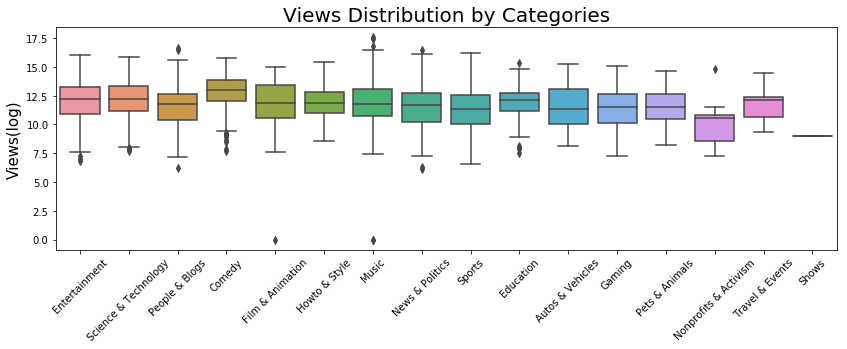

In [25]:
plt.figure(figsize = (14,9))

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=videos_Last)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribution by Categories", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.show()

Video with highest number of view is in Music category and comedy has the highest views median.

#### Category Level Distribution of like counts <a name="cld_likes"></a>

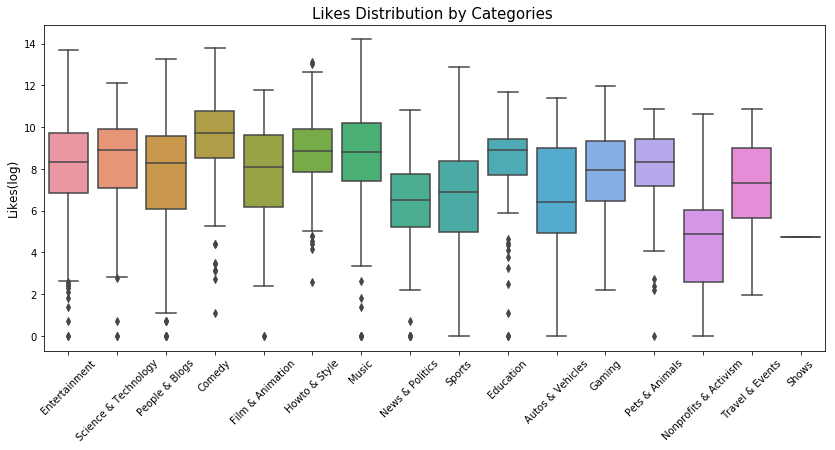

In [26]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=videos_Last)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribution by Categories ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

Video with highest number of like is in Music category,Comedy has the highest likes median.

#### Category Level Distribution of dislike counts <a name="cld_dislikes"></a>

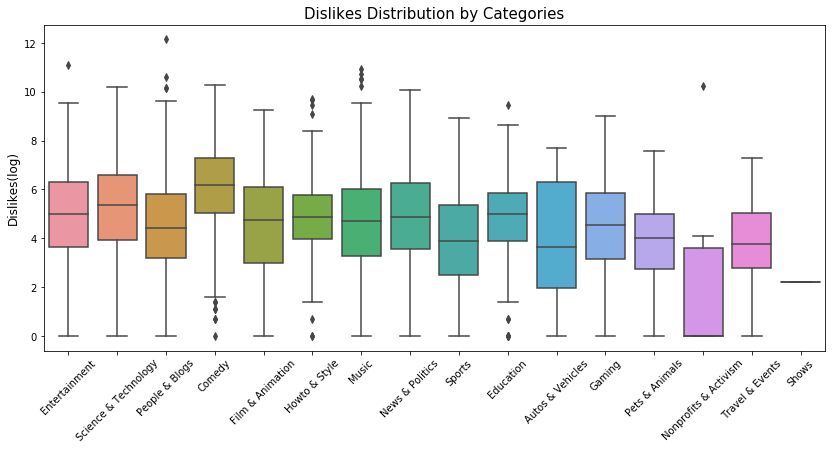

In [27]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=videos_Last)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes Distribution by Categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

Video with highest number of dislike is in People & Blogs category and Comedy has the highest dislikes median

#### Category Level Distribution of comment counts <a name="cld_comments"></a>

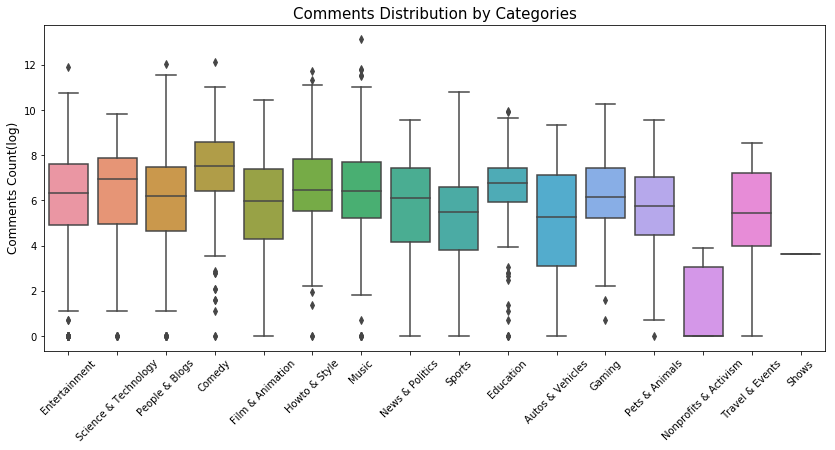

In [28]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=videos_Last)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribution by Categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

Video with highest number of comment is in Music category and Comedy has the highest comments median.

### Percentage of viewers that left a like/dislike/comment <a name="percentage_viewers"></a>

#### Create Attributes: like_rate, dislike_rate, comment_rate <a name="create_rate_attrs"></a>

In [29]:
videos_df['like_rate'] =  videos_df ['likes'] / videos_df['views'] * 100
videos_df['dislike_rate'] =  videos_df ['dislikes'] / videos_df['views'] * 100
videos_df['comment_rate'] =  videos_df ['comment_total'] / videos_df['views'] * 100
videos_Last = videos_df.drop_duplicates('video_id') # drop duplicates

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


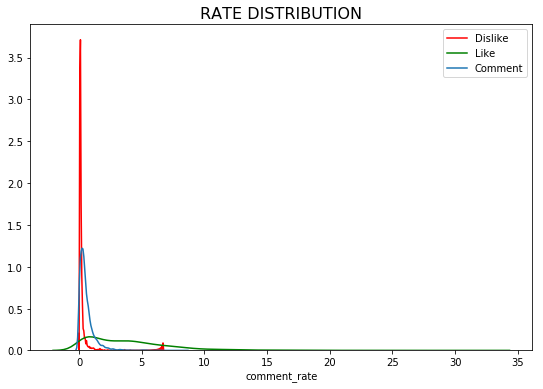

In [30]:
plt.figure(figsize = (9,6))

g1 = sns.distplot(videos_Last['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(videos_Last['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(videos_Last['comment_rate'],hist=False,label="Comment")
g1.set_title('RATE DISTRIBUTION', fontsize=16)
plt.legend()
plt.show()

dislike rate distribution has a pointy peak at zero meaning that majority of the viewer do not dislike.


Like rate distribution has a peak at around 1% meaning that averagely one percent of the viewer will like the video.

Comment rate distribution is skewed positively and flatten. This means that comment rate is generally higher than like rate and dislike rate. However, we must also take note that an youtube account can make multiple comments on a video but can only like or dislike once on a video. 

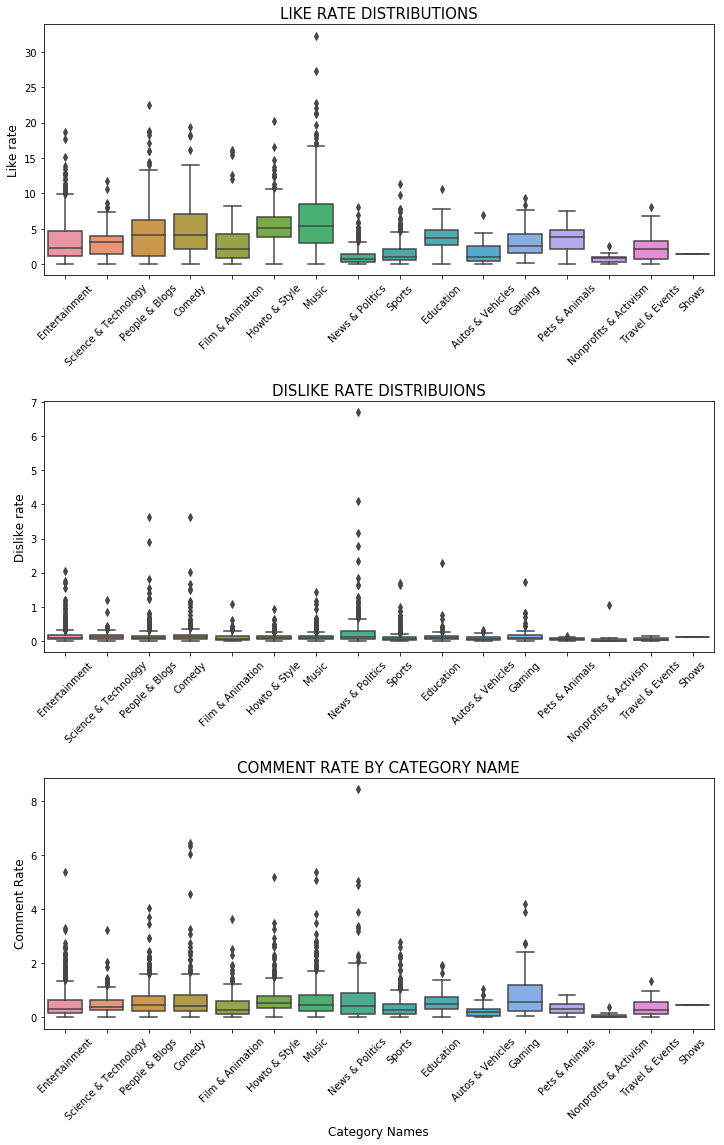

In [31]:
plt.figure(figsize = (12,18))

plt.subplot(311)
g= sns.boxplot(x='category_name',y='like_rate',  data=videos_Last)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("LIKE RATE DISTRIBUTIONS", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

plt.subplot(312)
g1= sns.boxplot(y='dislike_rate', x='category_name', data=videos_Last)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("DISLIKE RATE DISTRIBUIONS", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Dislike rate", fontsize=12)

plt.subplot(313)
g2= sns.boxplot(y='comment_rate', x='category_name', data=videos_Last)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("COMMENT RATE BY CATEGORY NAME", fontsize=15)
g2.set_xlabel("Category Names", fontsize=12)
g2.set_ylabel("Comment Rate", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

plt.show()

Video with highest like rate is in Music category. Up to 30% of viewers like a video under Music category if we assume that one view is correspond to one viewer. 

Video with highest dislike rate is in News & Politics. Up to 7% of viewers will dislike a videos under News & Politics category if we assume that one view is correspond to one viewer.

Video with highest comment rate is in News & Politics. Up to 8% of viewers will write comments after viewing videos under News & Politics category if we assume that one view is correspond to one viewer. .


### Analysing Correlation Matrix of Numerical Variables <a name="analysing_correlation"></a>

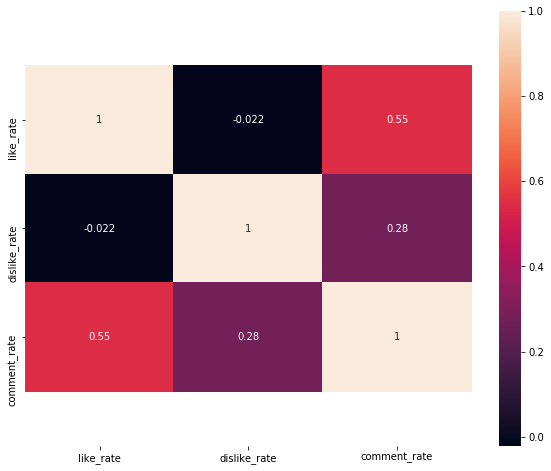

In [32]:
plt.figure(figsize = (10,8))
ax = sns.heatmap(videos_Last[['like_rate', 'dislike_rate', 'comment_rate']].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) # bugfix
plt.show()

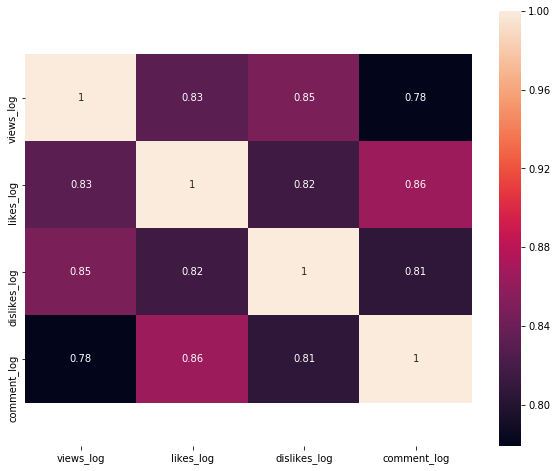

In [33]:
plt.figure(figsize = (10,8))
ax = sns.heatmap(videos_Last[['views_log', 'likes_log', 'dislikes_log', 'comment_log']].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top - .5) # bugfix
plt.show()

views_log has correlation with likes_log, dislikes_log and comment_log as it bring other activities.


### Save Comments and Videos Files after Pre-processed <a name="save_comments_videos"></a>

In [34]:
if not os.path.exists(cwd/'output'):
    os.mkdir(cwd/'output')

In [35]:
comments_df.to_csv(cwd/'output'/"comments.csv", index=False)
videos_df.to_csv(cwd/'output'/"videos.csv", index=False)